# Getting Sentiments from IMDB Dataset
1. Using Pretrained Model
2. Without Using pretrained Model <br>
Reference: Deep Learning with python book by Francois Chollet <br>

this dataset is a collection of 50,000 positive and negative reviews which is divided into 25,000 for Training and rest 25,000 for testing

In [35]:
import tensorflow as tf

print(tf.__version__)

# !pip install tensorflow==2.0.0  # uncomment this line if tensorlflow 2.0.x version is not running

2.0.0


## Downoad IMDB Dataset

In [3]:
!wget --no-check-certificate \
    http://mng.bz/0tIo\
    -O imdb.zip

--2019-10-28 06:01:42--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2019-10-28 06:01:42--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2019-10-28 06:01:42--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.144.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.144.69|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘imdb.zip’

imdb.zip            100%[===================>]  57.90M  74.0MB/s    in 0.8s    

2019-10-28 06:01:43 (74.0 MB/s) - ‘imdb.zip’ saved [60711700/6

## Walk through Downlaoded IMDB dataset directory structure

In [42]:
import os
import zipfile

# unzip training dataset
local_zip = 'imdb.zip' 
with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
  zipobj.extractall('imdb')  
#   zip.printdir()    # Display contents of zip file


# walk through the extracted training directory
for root, directories, files in os.walk('imdb'): 
  print(root)
  print(directories)
#   print(files)


imdb
['__MACOSX', 'aclImdb']
imdb/__MACOSX
['aclImdb']
imdb/__MACOSX/aclImdb
['train', 'test']
imdb/__MACOSX/aclImdb/train
['pos', 'neg']
imdb/__MACOSX/aclImdb/train/pos
[]
imdb/__MACOSX/aclImdb/train/neg
[]
imdb/__MACOSX/aclImdb/test
['pos', 'neg']
imdb/__MACOSX/aclImdb/test/pos
[]
imdb/__MACOSX/aclImdb/test/neg
[]
imdb/aclImdb
['train', 'test']
imdb/aclImdb/train
['pos', 'neg']
imdb/aclImdb/train/pos
[]
imdb/aclImdb/train/neg
[]
imdb/aclImdb/test
['pos', 'neg']
imdb/aclImdb/test/pos
[]
imdb/aclImdb/test/neg
[]


## Processing the labels of raw IMDB data

In [0]:
import os

imdb_dir = '/content/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      with open(os.path.join(dir_name, fname)) as f:
        texts.append(f.read())
      
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

## Global Macros Definition

In [0]:
MAXLEN = 100                # Maximum length of sentences to be used
TRAINING_SAMPLES = 100      # Number of samples to be used for Training the model
VALIDATION_SAMPLES = 10000  # Number of validation samples to be used
MAX_WORDS = 10000           # Maximum words to be used from tokenized vocabulary
OOV_TOK = "<OOV>"           # Out of vocabulary (OOV) for undefined tokens
TRUNC_TYPE = 'post'         # truncate/cut from the back of review post a defined length

## Tokenizing the text of the raw IMDB data

In [101]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np

# create instance of Tokenizer. Since "<OOV>" is just a simple string. So you can use any unique string instead of this
tokenizer = Tokenizer(num_words = MAX_WORDS, oov_token = OOV_TOK)

tokenizer.fit_on_texts(texts)                   # encode the passed data
word_index = tokenizer.word_index               # convert sentences to a dictionary of word tokens

sequences = tokenizer.texts_to_sequences(texts)  # convert each sentence to lists of tokens

data = pad_sequences(sequences, maxlen = MAXLEN, truncating=TRUNC_TYPE) # append/pad zeroes to make all sentences token list to same size

print("\nNumber of Unique tokens = ", len(word_index))
print("\nTraining sentence = ", texts[0])
print("\nSequence = ", sequences[0])
print("\nPadded Sequence:\n", data[0])


labels = np.asarray(labels)   # converts label list to numpy array

print("\nShape of data tensor = ", data.shape)
print("\nShape of label tensor = ", labels.shape)

# Splits data into training and validation set, but first suffles the data because dataset are 
# ordered (all negative first, then all positive) 
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:TRAINING_SAMPLES]
y_train = labels[:TRAINING_SAMPLES]

x_val = data[TRAINING_SAMPLES: TRAINING_SAMPLES + VALIDATION_SAMPLES]
y_val = labels[TRAINING_SAMPLES: TRAINING_SAMPLES + VALIDATION_SAMPLES]


Number of Unique tokens =  87394

Training sentence =  Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.

Sequence =  [283, 172, 444, 6417, 46, 3586

## Download GLOVe (Global Vectors for Word Representation) Word Embeddings
Download Link: https://nlp.stanford.edu/projects/glove <br>
Download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, containing  100-dimensional  embedding vectors for 400,000 words (or nonword tokens) and Unzip it. 

In [9]:
!wget --no-check-certificate \
    http://nlp.stanford.edu/data/glove.6B.zip\
    -O Glove.zip

--2019-10-28 06:05:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-10-28 06:05:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-10-28 06:05:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘Glove.zip’

Glove.zip 

## Walk through Glove directory structure

In [60]:
import os
import zipfile

# unzip training dataset
local_glove_zip = '/content/Glove.zip' 

with zipfile.ZipFile(local_glove_zip, 'r') as glovezipobj:  # open a zip file in read mode
  glovezipobj.extractall('Glove')  
#   zip.printdir()    # Display contents of zip file


# walk through the extracted training directory
for root, directories, files in os.walk('Glove'): 
  print(root)
  print(directories)
  print(files)

Glove
[]
['glove.6B.300d.txt', 'glove.6B.50d.txt', 'glove.6B.200d.txt', 'glove.6B.100d.txt']


## Parsing the GloVe word-embeddings file
Parse the unzipped file (a *.txt file) to build an index that maps words (as strings) to their vector representation (as number vectors)

In [91]:
glove_dir = "/content/Glove"

embeddings_index = {}     # An empty dictionary

with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
  for line in f:
    values = line.split()  # Split file one line at a time
    word = values[0]  # Get the word out of line which is at index 0
    coefs = np.asarray(values[1:], dtype='float32')  # Store the coefficients as numpy array
    embeddings_index[word] = coefs

print(f"Found {len(embeddings_index)} word vectors")

Found 400000 word vectors


## Preparing the GloVe word-embeddings matrix
Build an embedding matrix that you can load into an Embedding layer. It
must be a matrix of shape (MAX_WORDS, EMBEDDING_DIMENSION), where each entry i contains the EMBEDDING_DIMENSION-dimensional vector for the word of index i in the reference word index (built during tokenization). Note that index 0 isn’t supposed to stand for any word or token—it’s a placeholder.

In [0]:
EMBEDDING_DIMENSION = 100

embedding_matrix = np.zeros((MAX_WORDS, EMBEDDING_DIMENSION))
for word, i in word_index.items():
  if i < MAX_WORDS:
    # word not found in the embedding index will be all zeroes
    embedding_vector = embeddings_index.get(word)    # get value corresponding to key from dictionary
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

## Define the Model

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Embeddings layer is the main layer that finds the relationship between different words and 
# place the words near to each other  that have similar meanings. For example movie review like
# funny and hilarious have similar meanings and so will be placed near to each other.
model.add(Embedding(MAX_WORDS, EMBEDDING_DIMENSION, input_length=MAXLEN))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Loading pretrained GLOVE word embeddings into the Embedding layer
The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i.

Freeze the Embedding layer (set its trainable attribute to False), following the same rationale you’re already familiar with in the context of pretrained convnet features: when parts of a model are pretrained (like your Embedding layer) and parts are randomly initialized (like your classifier), the pretrained parts shouldn’t be updated during training, to avoid forgetting what they already know. The large gradient updates triggered by the randomly initialized layers would be disruptive to the already-learned features. 

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False    # Freeze the Embedding layer

## Training and evaluation

In [106]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 2s 16ms/sample - loss: 1.9523 - acc: 0.8200 - val_loss: 2.3354 - val_acc: 0.4978
Epoch 2/20
100/100 [==============================] - 1s 9ms/sample - loss: 0.0085 - acc: 1.0000 - val_loss: 1.5201 - val_acc: 0.5128
Epoch 3/20
100/100 [==============================] - 1s 9ms/sample - loss: 0.0023 - acc: 1.0000 - val_loss: 1.4720 - val_acc: 0.5150
Epoch 4/20
100/100 [==============================] - 1s 9ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 1.3565 - val_acc: 0.5207
Epoch 5/20
100/100 [==============================] - 1s 10ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 1.4882 - val_acc: 0.5146
Epoch 6/20
100/100 [==============================] - 1s 10ms/sample - loss: 8.1177e-04 - acc: 1.0000 - val_loss: 1.3644 - val_acc: 0.5211
Epoch 7/20
100/100 [==============================] - 1s 10ms/sample - loss: 6.7705e-04 - acc: 1.0000 - val_loss: 1.4558 - val_acc: 0.5160
Ep

## Plotting the results
We can se that the model starts overfitting because we have taken just 200 training samples. Validation accuracy has high variance for same reason.

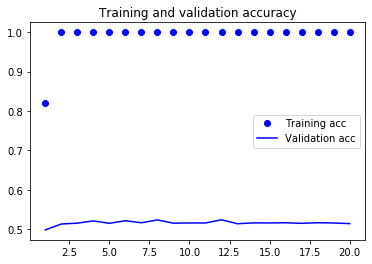

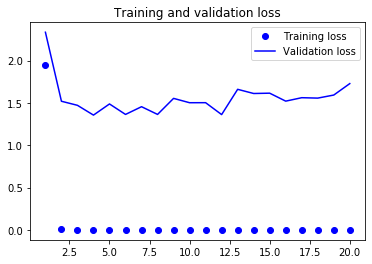

In [107]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Training the same model without pretrained word embeddings
You can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer. In that case, you’ll  learn a task-
specific embedding of the input tokens, which is generally more powerful  than pretrained word embeddings when lots of data is available. But in this case, you have only few hundred training samples

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIMENSION, input_length=MAXLEN))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',loss = 'binary_crossentropy', metrics=['acc']) 

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_15 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 2s 16ms/sample - loss: 0.6903 - acc: 0.5600 - val_loss: 0.6967 - val_acc: 0.4935
Epoch 2/20
100/100 [==============================] - 1s 1


## Plotting the results
Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings outperform jointly learned embeddings. If you increase the number of training samples, this will quickly stop being the case

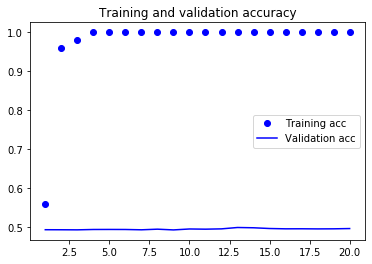

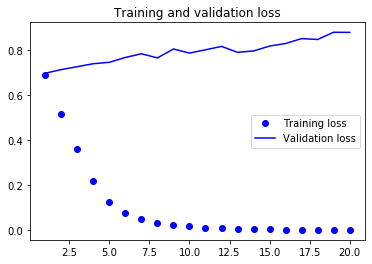

In [110]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model on the test data

## Tokenizing the data of the test set

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      with open(os.path.join(dir_name, fname)) as f:
        texts.append(f.read())

    if label_type == 'neg':
      labels.append(0)
    else:
      labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=MAXLEN)
y_test = np.asarray(labels)

## Evaluating the model on the test set

In [112]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5982065118074418, 0.51856]